# Trabalhando os dados

## Carregando o dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

from keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import tensorflow as tf

import random

2024-11-29 18:14:52.666024: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 18:14:52.676998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732914892.690426    9953 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732914892.694468    9953 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 18:14:52.708483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
seed = 1000

tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed) 

In [3]:
ds = pd.read_csv('dataset/train_corrigido.csv', header=0)
print(ds.shape)
ds.head(5)

/tmp/ipykernel_9953/1130610560.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv('dataset/train_corrigido.csv', header=0)


(177024, 509)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Preenchendo os nulos com zero (com exceção das colunas de Atividade Física)

In [4]:
columns_to_fill = []
for prefix in ['bg-', 'insulin-', 'carbs-', 'hr-', 'steps-', 'cals-']:
    cols_to_fill = [col for col in ds.columns if col.startswith(prefix)]
    columns_to_fill += cols_to_fill
    # ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna(0.0)

ds[columns_to_fill] = ds[columns_to_fill].interpolate()

imputer = SimpleImputer()
ds[columns_to_fill] = imputer.fit_transform(ds[columns_to_fill])

ds.head(5)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num
0,p01_0,p01,06:10:00,8.263101,8.254405,9.6,8.260897,8.24824,9.7,8.406204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,0
1,p01_1,p01,06:25:00,8.263101,8.254405,9.7,8.260897,8.24824,9.2,8.406204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1
2,p01_2,p01,06:40:00,8.263101,8.254405,9.2,8.260897,8.24824,8.7,8.406204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,2
3,p01_3,p01,06:55:00,8.263101,8.254405,8.7,8.260897,8.24824,8.4,8.406204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,3
4,p01_4,p01,07:10:00,8.263101,8.254405,8.4,8.260897,8.24824,8.1,8.406204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,4


## Preencher com "other" as ativiades físicas nulas

In [5]:
cols_to_fill = [col for col in ds.columns if col.startswith('activity-')]

ds.loc[:, cols_to_fill] = ds.loc[:, cols_to_fill].fillna('other')

## Convertendo o time num inteiro crescente

In [6]:
ds['minutes_since_start'] = pd.to_datetime(ds['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(ds['time'], format="%H:%M:%S").dt.minute
ds = ds.drop(columns=['time'])
ds.head(5)

/tmp/ipykernel_9953/161608706.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds['minutes_since_start'] = pd.to_datetime(ds['time'], format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(ds['time'], format="%H:%M:%S").dt.minute


,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num,minutes_since_start
0,p01_0,p01,8.263101,8.254405,9.6,8.260897,8.24824,9.7,8.406204,8.239731,...,other,other,other,other,other,other,other,13.4,0,370
1,p01_1,p01,8.263101,8.254405,9.7,8.260897,8.24824,9.2,8.406204,8.239731,...,other,other,other,other,other,other,other,12.8,1,385
2,p01_2,p01,8.263101,8.254405,9.2,8.260897,8.24824,8.7,8.406204,8.239731,...,other,other,other,other,other,other,other,15.5,2,400
3,p01_3,p01,8.263101,8.254405,8.7,8.260897,8.24824,8.4,8.406204,8.239731,...,other,other,other,other,other,other,other,14.8,3,415
4,p01_4,p01,8.263101,8.254405,8.4,8.260897,8.24824,8.1,8.406204,8.239731,...,other,other,other,other,other,other,other,12.7,4,430


In [7]:
ds["time_sin"] = np.sin(2 * np.pi / 1440 * ds['minutes_since_start']) + 2
ds["time_cos"] = np.cos(2 * np.pi / 1440 * ds['minutes_since_start']) + 2
ds = ds.drop(columns=['minutes_since_start'])
ds.head(5)

/tmp/ipykernel_9953/3596814525.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds["time_sin"] = np.sin(2 * np.pi / 1440 * ds['minutes_since_start']) + 2
/tmp/ipykernel_9953/3596814525.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds["time_cos"] = np.cos(2 * np.pi / 1440 * ds['minutes_since_start']) + 2


,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,id_num,time_sin,time_cos
0,p01_0,p01,8.263101,8.254405,9.6,8.260897,8.24824,9.7,8.406204,8.239731,...,other,other,other,other,other,other,13.4,0,2.999048,1.956381
1,p01_1,p01,8.263101,8.254405,9.7,8.260897,8.24824,9.2,8.406204,8.239731,...,other,other,other,other,other,other,12.8,1,2.994056,1.891133
2,p01_2,p01,8.263101,8.254405,9.2,8.260897,8.24824,8.7,8.406204,8.239731,...,other,other,other,other,other,other,15.5,2,2.984808,1.826352
3,p01_3,p01,8.263101,8.254405,8.7,8.260897,8.24824,8.4,8.406204,8.239731,...,other,other,other,other,other,other,14.8,3,2.971342,1.762314
4,p01_4,p01,8.263101,8.254405,8.4,8.260897,8.24824,8.1,8.406204,8.239731,...,other,other,other,other,other,other,12.7,4,2.953717,1.699294


## Removendo as colunas de identificação

In [8]:
cols_to_pop = ['id', 'p_num']
identificadores = ds[cols_to_pop].copy()
ds = ds.drop(columns=cols_to_pop)
ds = ds.drop(columns=["id_num"])
ds.head(5)

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_sin,time_cos
0,8.263101,8.254405,9.6,8.260897,8.24824,9.7,8.406204,8.239731,9.2,8.426236,...,other,other,other,other,other,other,other,13.4,2.999048,1.956381
1,8.263101,8.254405,9.7,8.260897,8.24824,9.2,8.406204,8.239731,8.7,8.426236,...,other,other,other,other,other,other,other,12.8,2.994056,1.891133
2,8.263101,8.254405,9.2,8.260897,8.24824,8.7,8.406204,8.239731,8.4,8.426236,...,other,other,other,other,other,other,other,15.5,2.984808,1.826352
3,8.263101,8.254405,8.7,8.260897,8.24824,8.4,8.406204,8.239731,8.1,8.426236,...,other,other,other,other,other,other,other,14.8,2.971342,1.762314
4,8.263101,8.254405,8.4,8.260897,8.24824,8.1,8.406204,8.239731,8.3,8.426236,...,other,other,other,other,other,other,other,12.7,2.953717,1.699294


## Trocando as colunas de atividade por um valor inteiro

In [9]:
# ds['activity-0:00'].unique()
mapeamento = {
    'other': 0, 'Walk': 1, 'Indoor climbing': 2, 'Yoga': 3, 'Zumba': 4, 'HIIT': 5,
    'Dancing': 6, 'Swim': 7, 'Outdoor Bike': 8, 'Aerobic Workout': 9, 'Sport': 10,
    'Walking': 11, 'Running': 12, 'Swimming': 13, 'Run': 14, 'Weights': 15, 'Workout': 16,
    'Tennis': 17, 'Strength training': 18, 'Stairclimber': 19, 'Spinning': 20, 'Hike': 21,
    'Bike':21
}

prefix = 'activity-'
cols_to_map = [col for col in ds.columns if col.startswith(prefix)]
ds[cols_to_map] = ds[cols_to_map].apply(lambda col: col.map(mapeamento))

ds.head(5)

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_sin,time_cos
0,8.263101,8.254405,9.6,8.260897,8.24824,9.7,8.406204,8.239731,9.2,8.426236,...,0,0,0,0,0,0,0,13.4,2.999048,1.956381
1,8.263101,8.254405,9.7,8.260897,8.24824,9.2,8.406204,8.239731,8.7,8.426236,...,0,0,0,0,0,0,0,12.8,2.994056,1.891133
2,8.263101,8.254405,9.2,8.260897,8.24824,8.7,8.406204,8.239731,8.4,8.426236,...,0,0,0,0,0,0,0,15.5,2.984808,1.826352
3,8.263101,8.254405,8.7,8.260897,8.24824,8.4,8.406204,8.239731,8.1,8.426236,...,0,0,0,0,0,0,0,14.8,2.971342,1.762314
4,8.263101,8.254405,8.4,8.260897,8.24824,8.1,8.406204,8.239731,8.3,8.426236,...,0,0,0,0,0,0,0,12.7,2.953717,1.699294


# Montando o modelo

## Separando treino e teste

In [10]:
train = ds.sample(frac=0.75, random_state=0)
test = ds.drop(train.index)

In [11]:
x_train = train
y_train = train.pop('bg+1:00')

In [12]:
print(x_train.shape)
x_train.head(5)

(132768, 506)


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,time_sin,time_cos
91143,10.890515,6.471,4.9,10.847561,6.361386,5.2,10.719293,6.282353,6.7,10.889519,...,0,0,0,0,0,0,1,1,1.357212,2.766044
35758,11.000000,11.000,11.4,11.700000,12.400000,12.6,13.000000,13.600000,13.8,14.500000,...,0,0,0,0,0,0,0,0,2.965926,2.258819
65296,9.500000,9.400,9.9,10.000000,10.300000,10.2,10.200000,9.800000,9.4,9.300000,...,0,0,0,0,0,0,0,0,1.123273,1.519011
14652,7.700000,7.700,8.0,8.200000,8.700000,9.8,10.500000,10.800000,10.7,10.700000,...,0,0,0,0,0,0,0,0,2.422618,2.906308
54561,9.300000,9.500,9.2,8.700000,8.400000,7.9,7.300000,6.900000,6.5,6.200000,...,0,0,0,0,0,0,0,0,2.939693,1.657980


In [13]:
print(y_train.shape)
y_train.head(5)

(132768,)


91143    7.6
35758    7.6
65296    6.2
14652    9.0
54561    5.7
Name: bg+1:00, dtype: float64

## Construindo o modelo

In [14]:
from keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


I0000 00:00:1732914907.393802    9953 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2609 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


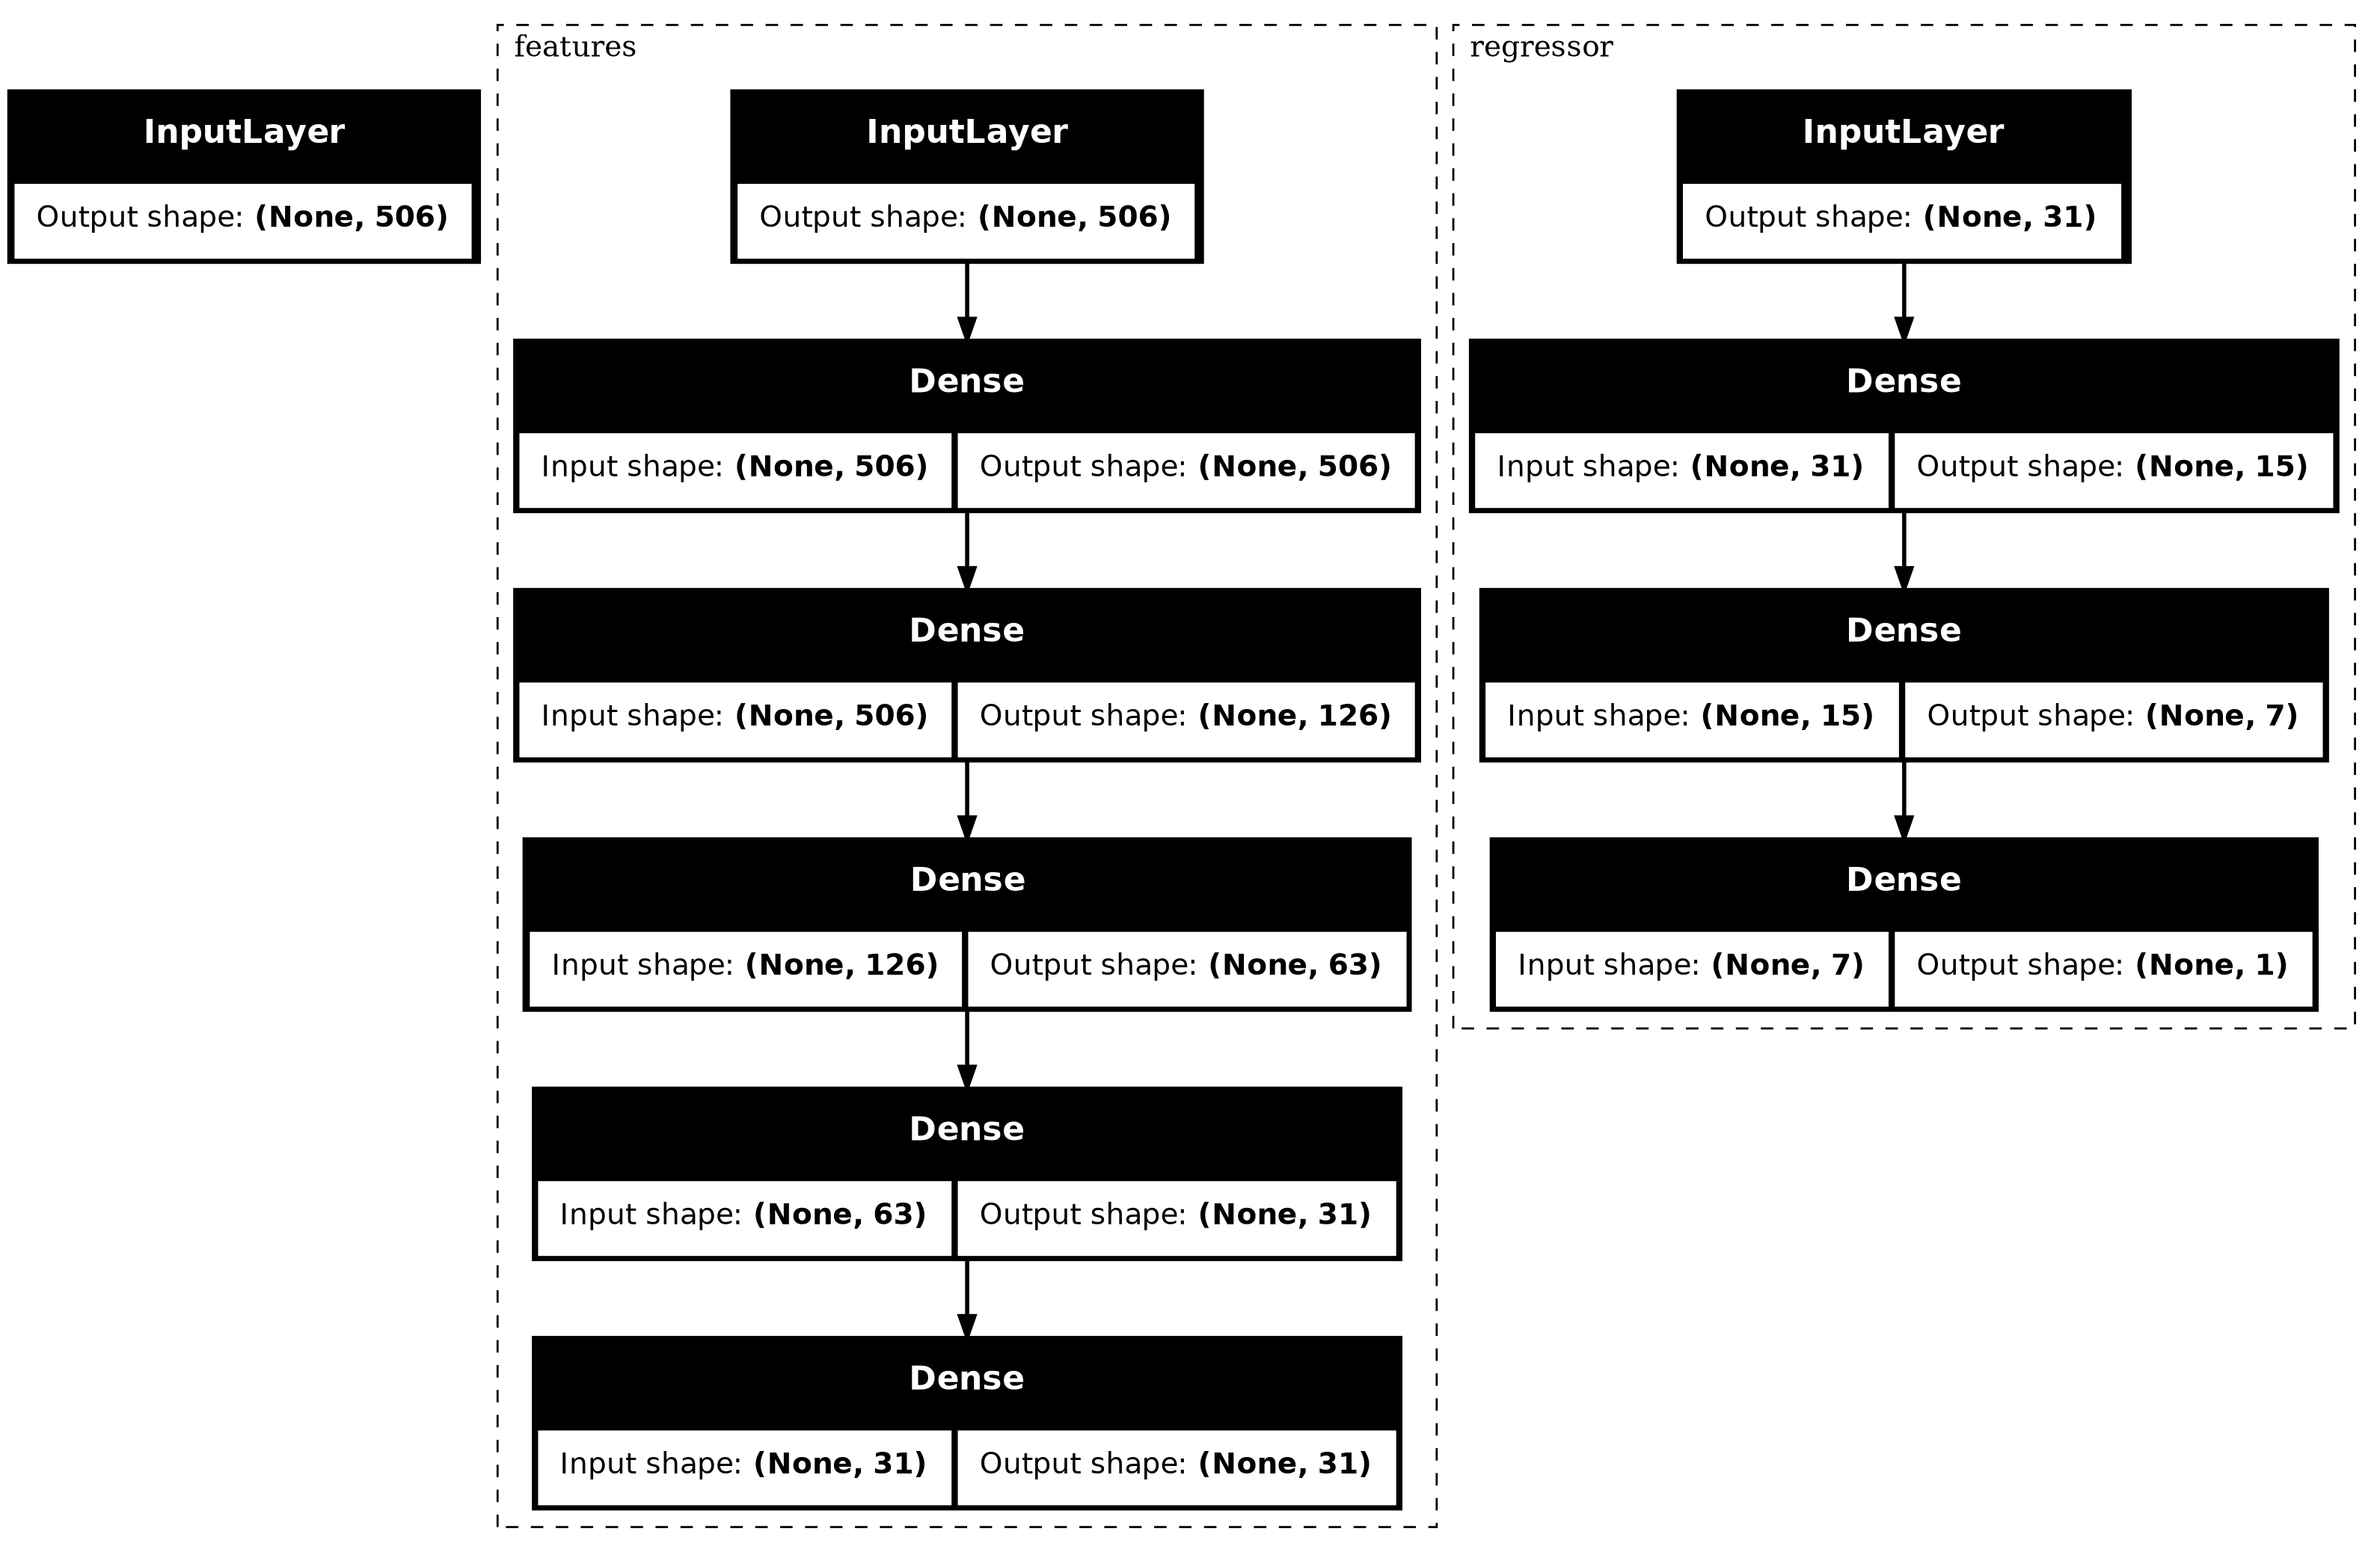

In [15]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims), activation=activation, use_bias=bias, kernel_regularizer="l1")(input_layer)
  # x_1 = tf.keras.layers.Dropout(0.2)(x_0)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims/8), activation=activation, use_bias=bias)(x_2)
  x_4 = Dense(int(input_dims/16), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims/16), activation=activation, name='encoder', use_bias=bias, kernel_regularizer="l2")(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(input_layer)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_2)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  # x_n = BatchNormalization()(input_layer)
  x_n = input_layer

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'elu', False)
model.compile(optimizer='Adamax', loss='mse', metrics=['mae', 'mse'])
plot_model(model, show_shapes=True, expand_nested=True)

## Treinando o modelo

In [16]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=200, validation_split = 0.2, callbacks=[callback])

Epoch 1/200


I0000 00:00:1732914909.317038   10060 service.cc:148] XLA service 0x7d982c009920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732914909.317054   10060 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-29 18:15:09.339935: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732914909.382235   10060 cuda_dnn.cc:529] Loaded cuDNN version 90300


 291/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 93.5733 - mae: 2.6915 - mse: 13.3306

I0000 00:00:1732914910.778699   10060 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3320/3320 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 59.7563 - mae: 2.2065 - mse: 8.6272 - val_loss: 18.0029 - val_mae: 1.8572 - val_mse: 5.7887
Epoch 2/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - loss: 14.4058 - mae: 1.8370 - mse: 5.8803 - val_loss: 8.5823 - val_mae: 1.8378 - val_mse: 5.4779
Epoch 3/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step - loss: 8.0815 - mae: 1.7594 - mse: 5.4144 - val_loss: 7.1592 - val_mae: 1.8053 - val_mse: 5.3052
Epoch 4/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - loss: 6.9802 - mae: 1.7260 - mse: 5.2230 - val_loss: 6.5790 - val_mae: 1.7712 - val_mse: 5.1637
Epoch 5/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - loss: 6.4761 - mae: 1.7027 - mse: 5.0911 - val_loss: 6.2803 - val_mae: 1.7686 - val_mse: 5.1082
Epoch 6/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 732us/step - loss: 6.1992 - mae: 1.6871 - mse: 5.0108 - val_loss: 6.1694 - val_mae: 1.7683 - val_mse: 5.0740
Epoch 7/200
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 3s 752us/step - loss: 6.0118 - mae: 1.

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch,rmse,val_rmse
64,4.979356,1.560888,4.358177,5.040287,1.559047,4.449385,64,2.087625,2.109357
65,4.982349,1.559442,4.351246,5.081606,1.553935,4.463369,65,2.085964,2.112669
66,4.982098,1.560480,4.354297,5.076328,1.554347,4.471549,66,2.086695,2.114604
67,4.982139,1.560221,4.354599,5.046415,1.549315,4.437530,67,2.086767,2.106545
68,4.984278,1.560045,4.354325,5.131601,1.560706,4.511406,68,2.086702,2.124007


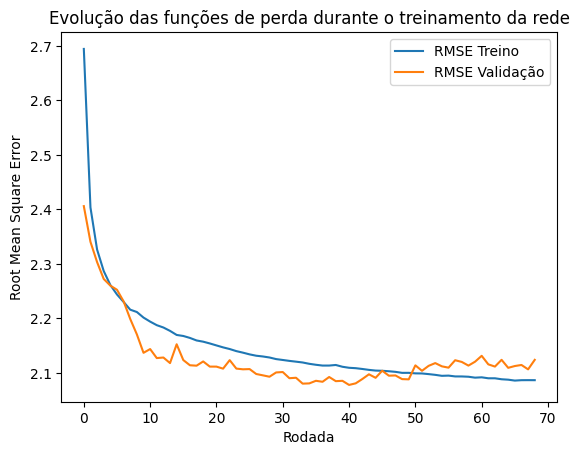

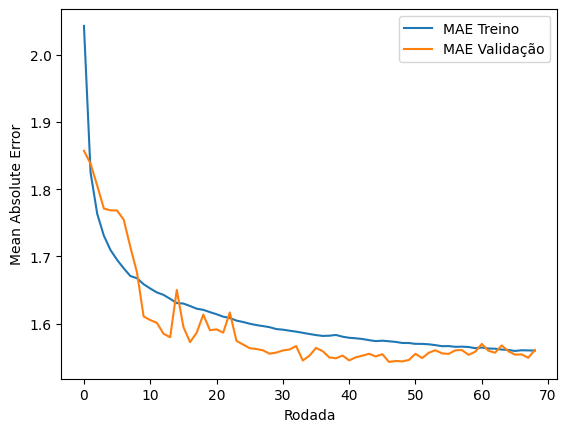

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Avaliando o modelo nos dados de teste

### Ajustando a base de teste

In [19]:
x_test = test
y_test = test.pop('bg+1:00')
print(x_test.shape)
x_test.head(5)

(44256, 506)


,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,time_sin,time_cos
2,8.263101,8.254405,9.200000,8.260897,8.24824,8.700000,8.406204,8.239731,8.4,8.426236,...,0,0,0,0,0,0,0,0,2.984808,1.826352
10,8.263101,8.254405,12.800000,8.260897,8.24824,13.900000,8.406204,8.239731,14.2,8.426236,...,0,0,0,0,0,0,0,0,2.766044,1.357212
21,8.263101,8.254405,17.300000,8.260897,8.24824,16.200000,8.406204,8.239731,15.1,8.426236,...,0,0,0,0,0,0,0,0,2.152123,1.011638
27,8.263101,13.400000,14.166667,8.260897,12.80000,14.533333,8.406204,15.500000,14.4,8.426236,...,0,0,0,0,0,0,0,0,1.741181,1.034074
30,8.263101,14.800000,14.566667,8.260897,12.70000,15.633333,8.406204,11.400000,15.9,8.426236,...,0,0,0,0,0,0,0,0,1.557711,1.103127


In [20]:
y_test.head(5)

2     15.5
10    17.4
21     4.8
27    13.1
30     8.3
Name: bg+1:00, dtype: float64

### Prevendo para a base de teste

In [21]:
y_pred = model.predict(x_test)
print(y_pred)

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step
[[11.010606 ]
 [ 9.903694 ]
 [ 6.616802 ]
 ...
 [ 6.5008373]
 [ 7.1846447]
 [ 9.929383 ]]


### Calculando o erro para a base de teste

In [22]:
mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
rmse = np.sqrt(mse)

In [23]:
print(f"RMSE Test: {rmse}")
print(f"MSE Test: {mse}")
print(f"MAE Test: {mae}")

RMSE Test: 2.079636573791504
MSE Test: 4.324888706207275
MAE Test: 1.5393022298812866


## Salvando o modelo em arquivo

In [24]:
model.save("brist1d_2.keras")